In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import ccf, grangercausalitytests, coint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
climate_data_path = '../ClimateDataTeam/climate_data/merged_weekly_avg_temp.csv'
air_pollutants_path = '../NewData/Weekly_Air_Pollutants.csv'
greenhouse_gas_path = '../NewData/Weekly_Greenhouse_Gas.csv'
population_path = '../NewData/Weekly_Population.csv'
power_usage_path = '../NewData/Weekly_Power_Usage.csv'

In [3]:
# 데이터 불러오기
datasets = {
    'Air Pollutants': pd.read_csv(air_pollutants_path),
    'Greenhouse Gas': pd.read_csv(greenhouse_gas_path),
    'Population': pd.read_csv(population_path),
    'Power Usage': pd.read_csv(power_usage_path),
}
climate_data_df = pd.read_csv(climate_data_path)


In [4]:
# datetime 컬럼을 datetime 객체로 변환
climate_data_df['datetime'] = pd.to_datetime(climate_data_df['datetime'])
for name, df in datasets.items():
    df['datetime'] = pd.to_datetime(df['datetime'])

# 결과 저장용
results = {}

--- Air Pollutants ---


C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verb

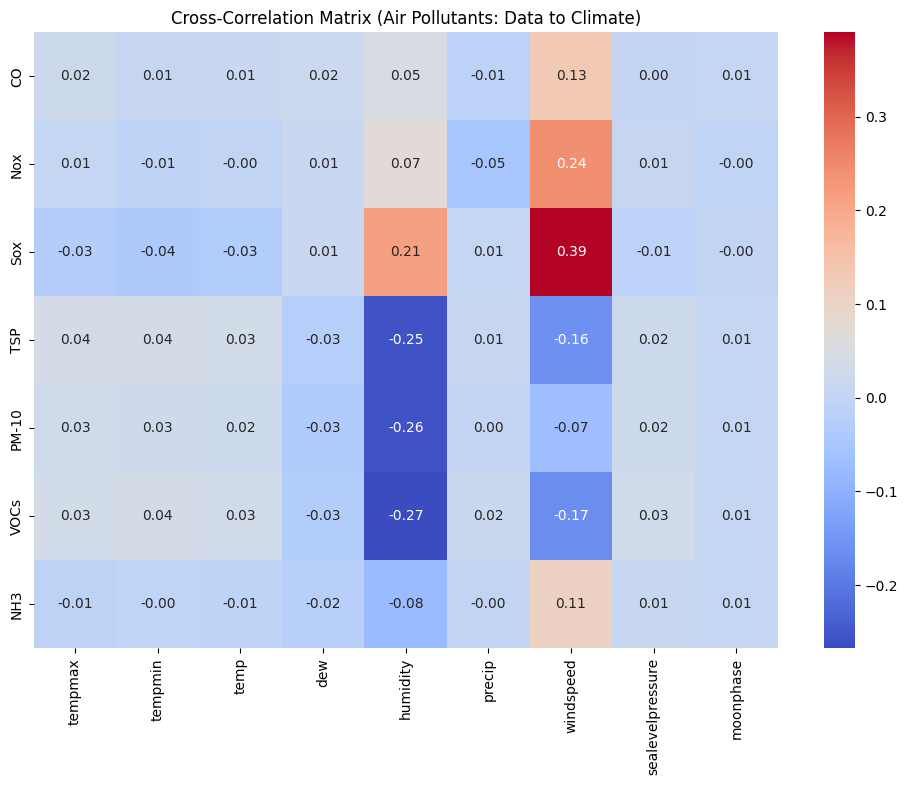

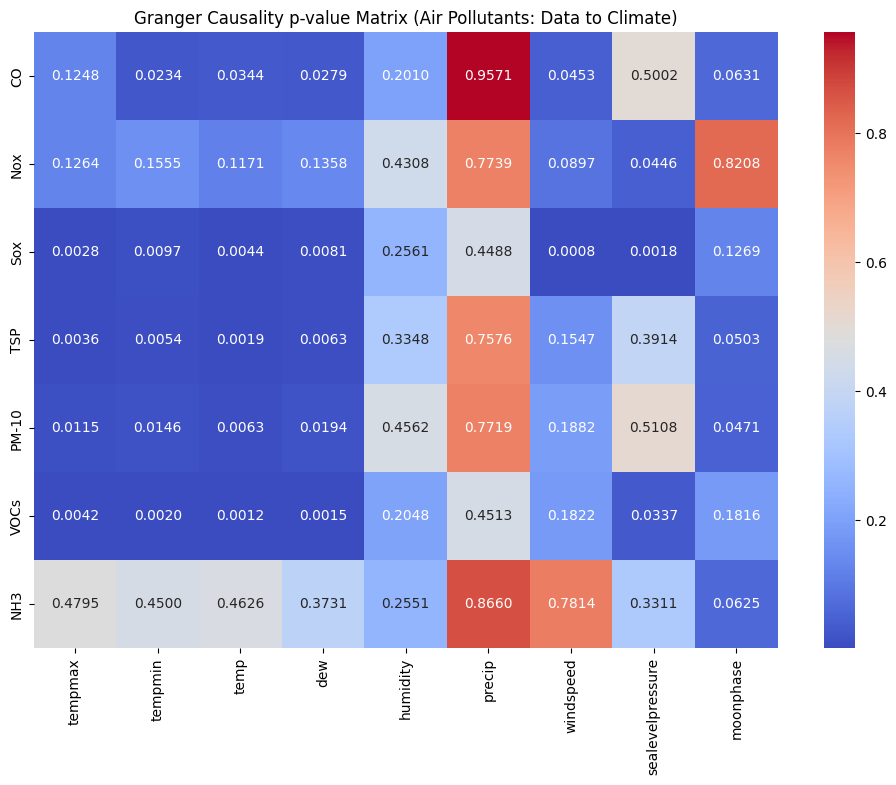

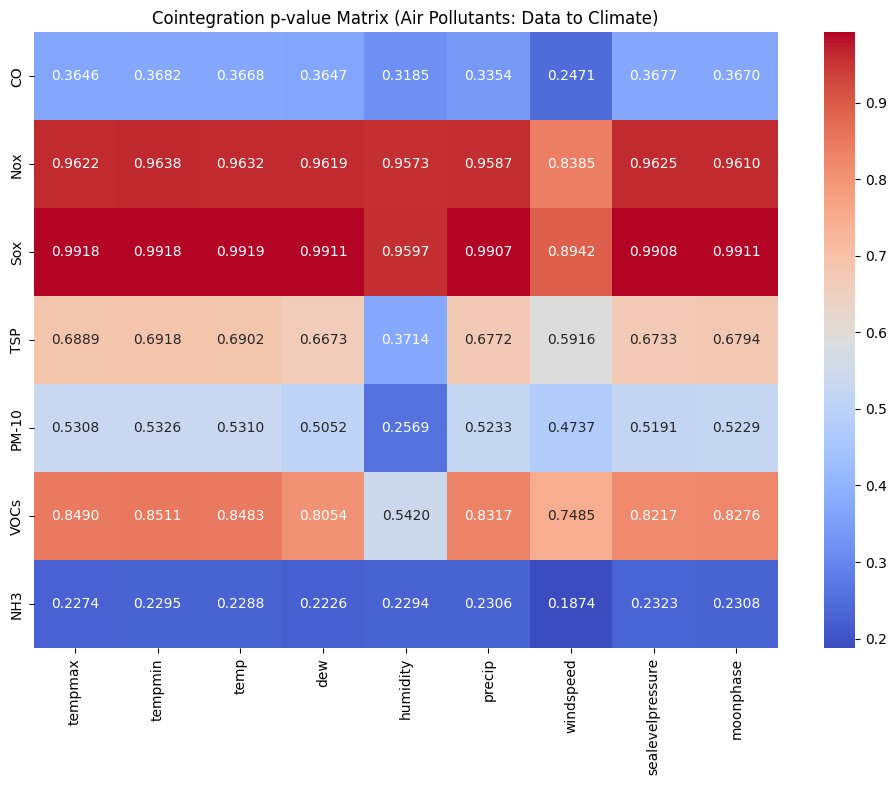

--- Greenhouse Gas ---


C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verb

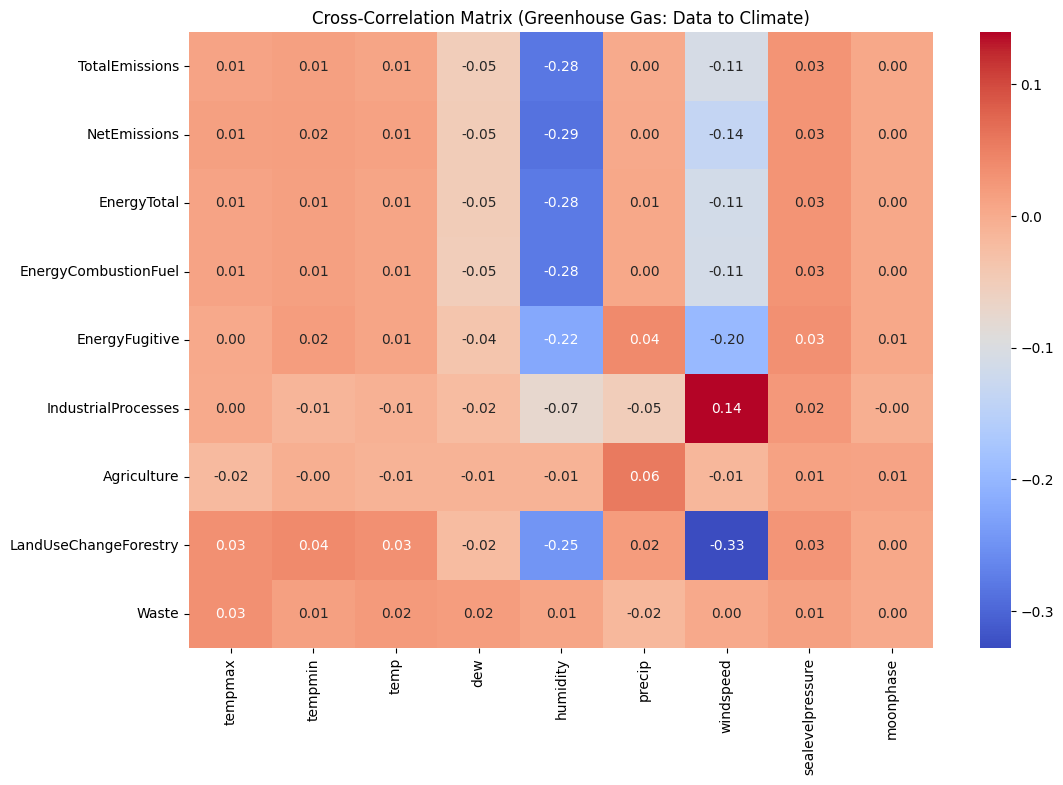

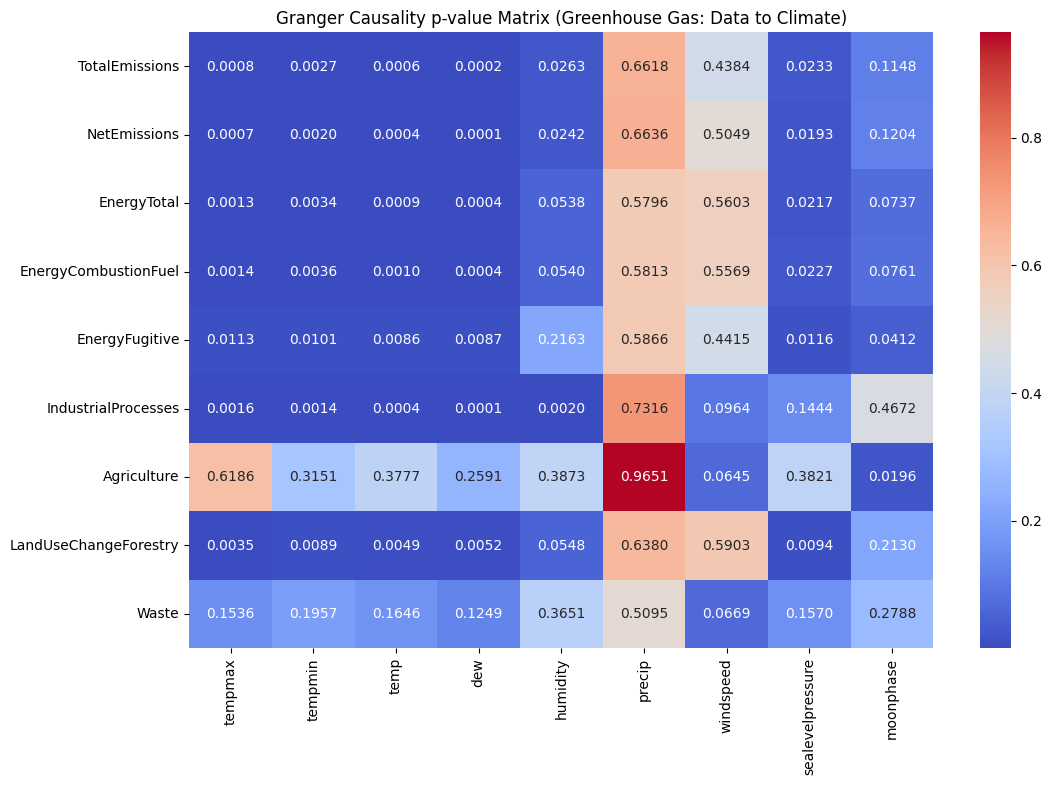

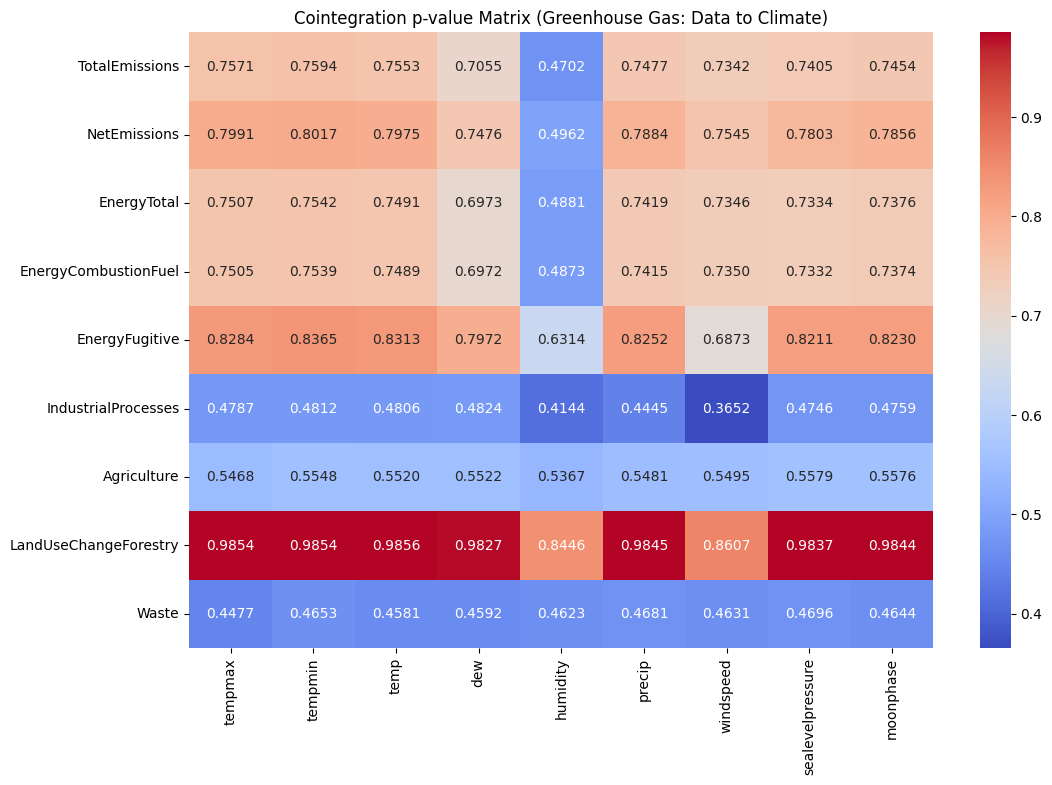

--- Population ---


C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verb

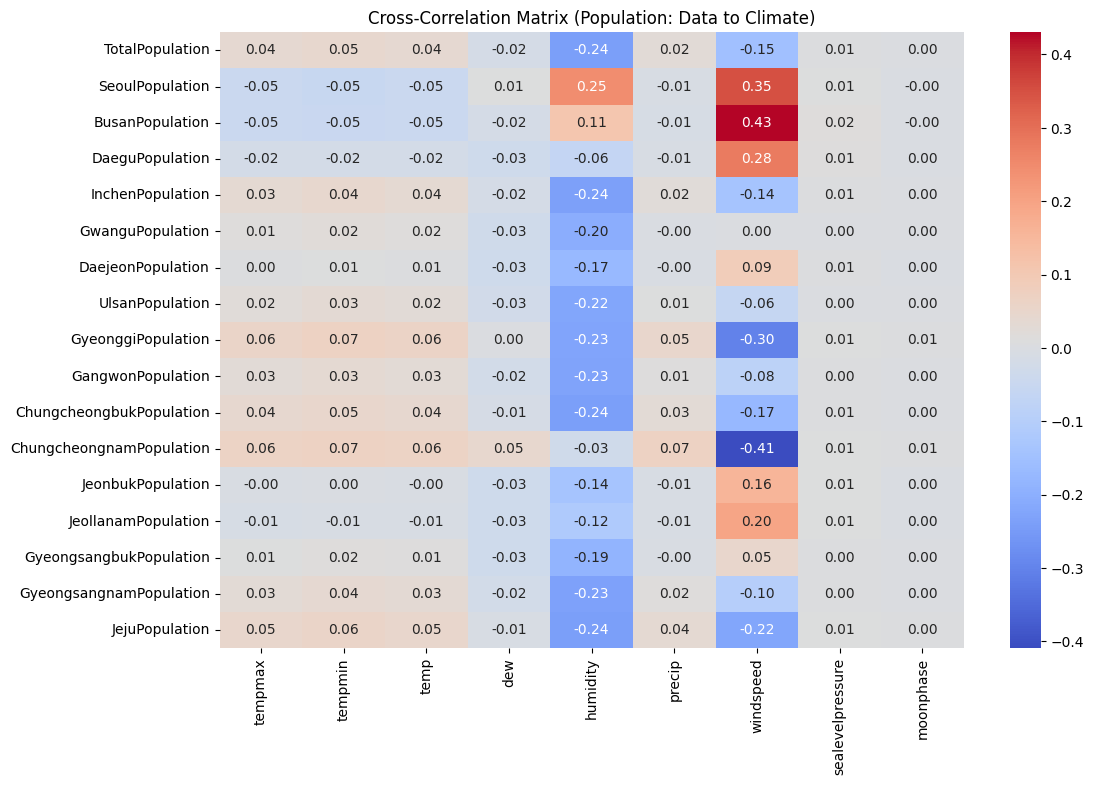

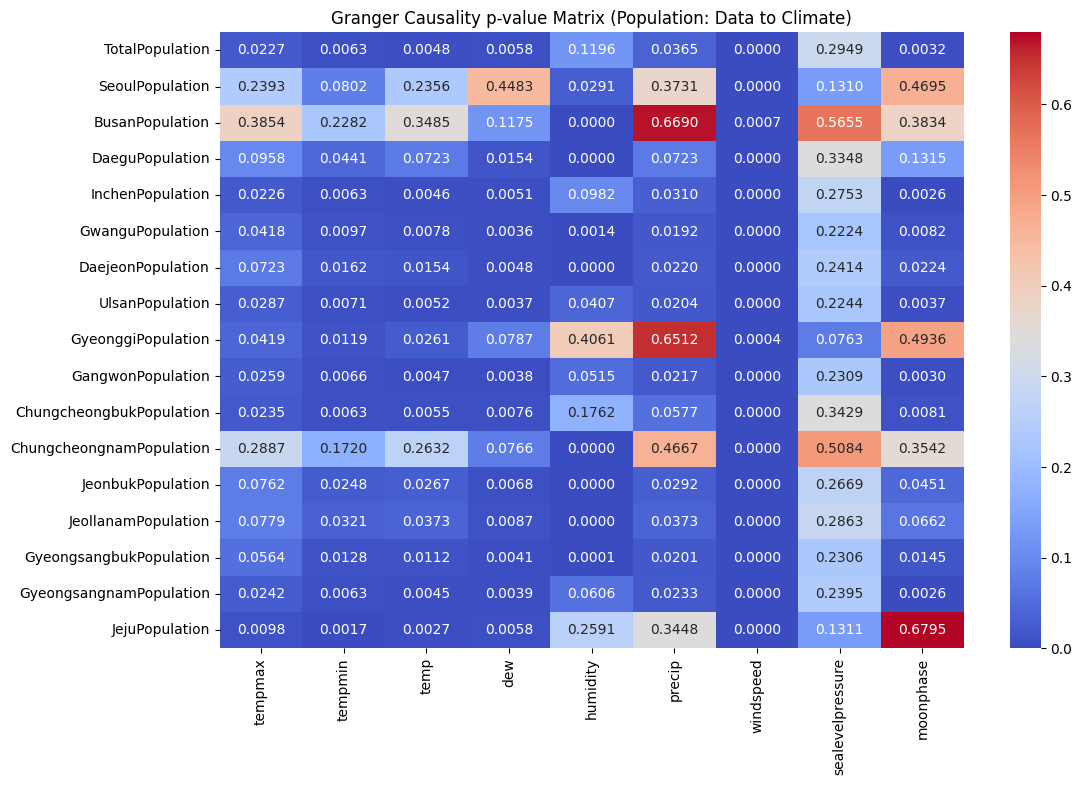

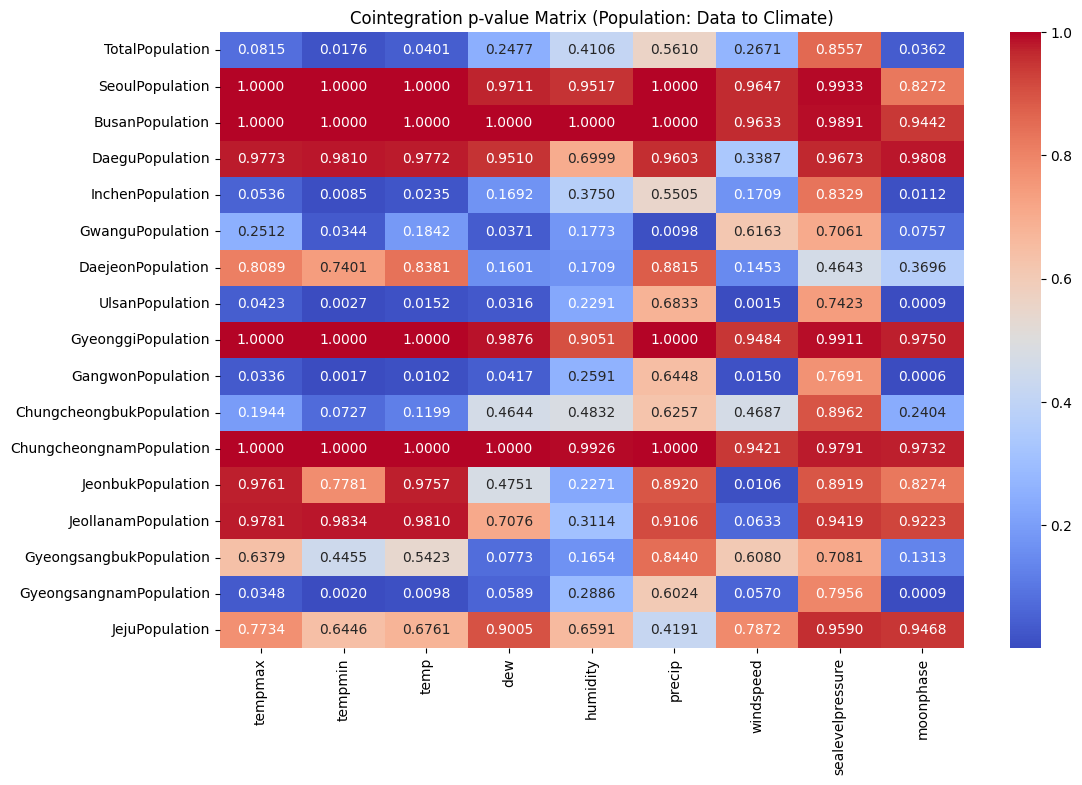

--- Power Usage ---


C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\limul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verb

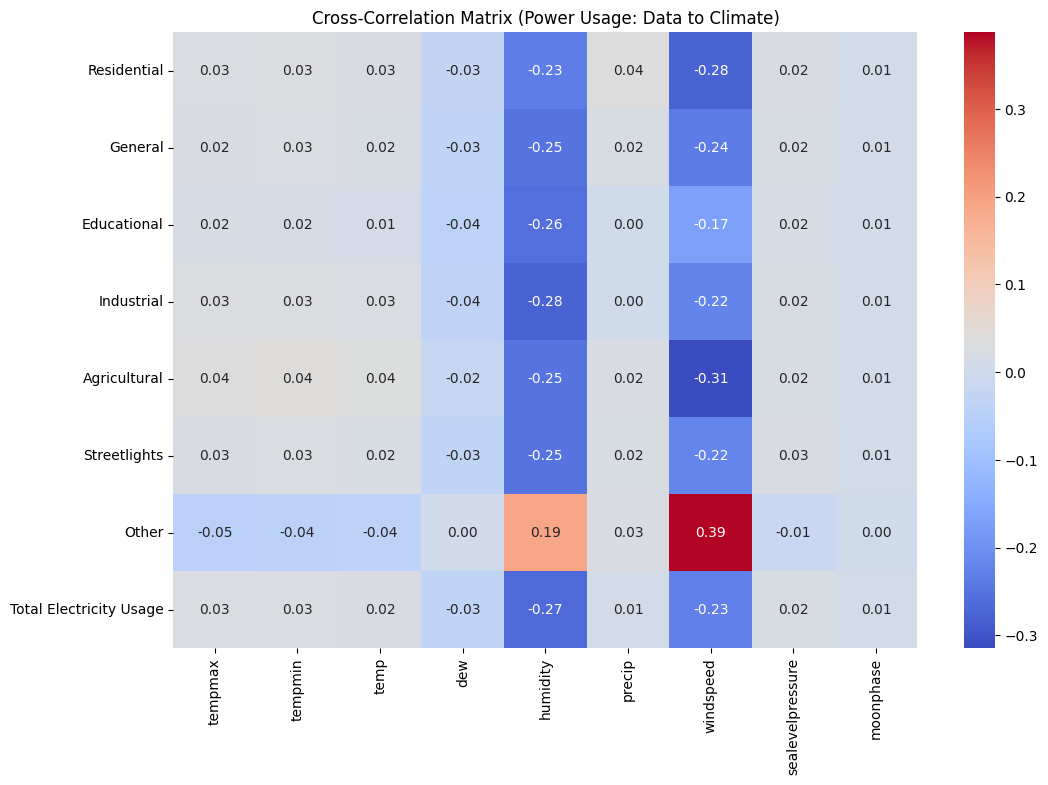

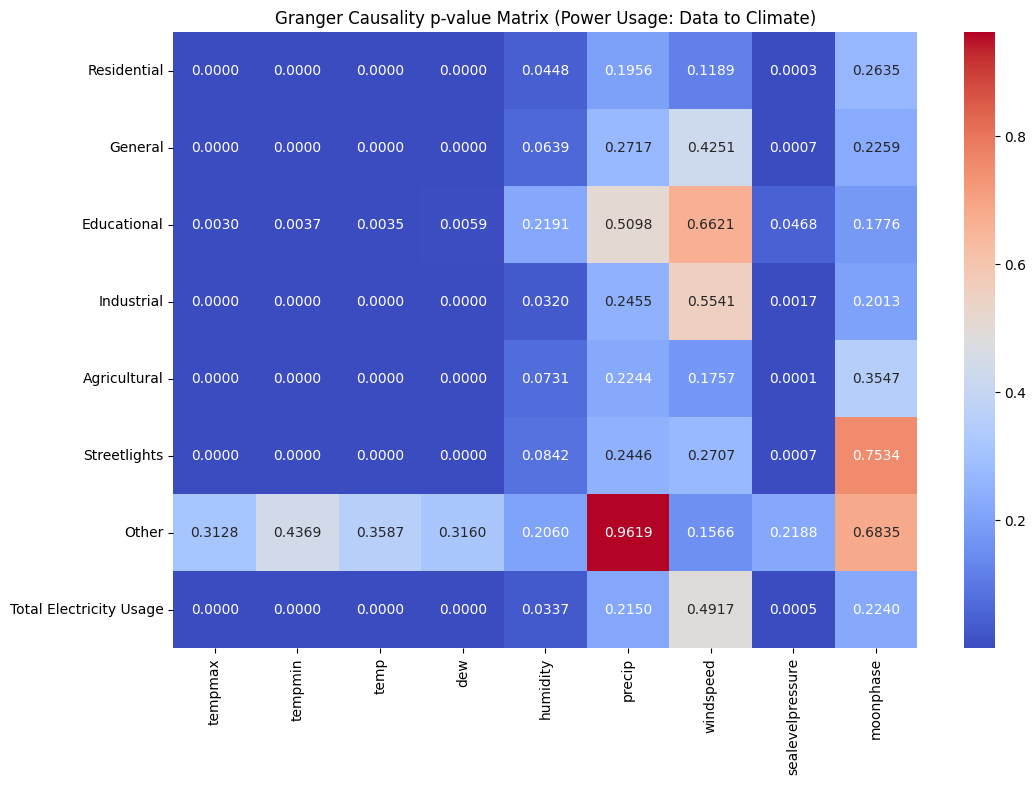

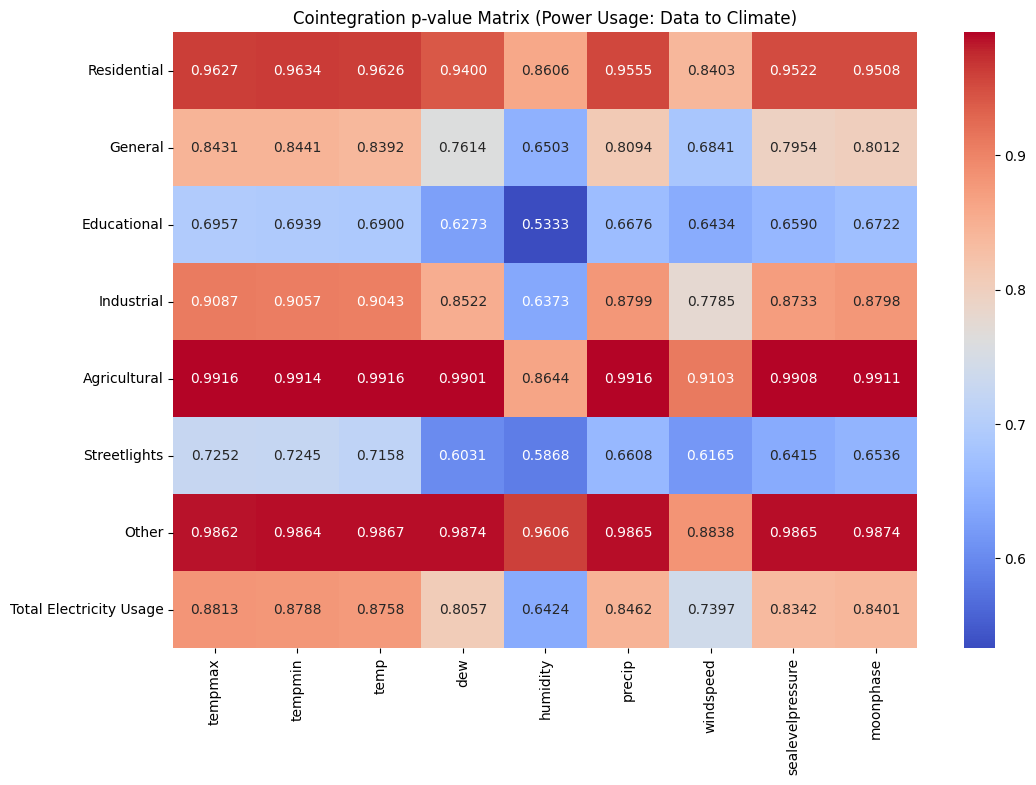

In [5]:
# 모든 데이터셋에 대해 분석
for name, df in datasets.items():
    print(f"--- {name} ---")
    # 데이터 병합
    merged_df = pd.merge(climate_data_df, df, on='datetime', how='inner')

    # 기후 데이터와 분석 데이터의 수치형 컬럼 추출
    climate_cols = climate_data_df.select_dtypes(include=[np.number]).columns
    data_cols = df.select_dtypes(include=[np.number]).columns

    # 분석 결과 저장용
    cross_corr_results = []
    granger_results = []
    coint_results = []

    for var2 in data_cols:  # 원인 변수
        for var1 in climate_cols:  # 결과 변수
            # 교차상관 분석 (CCF)
            cross_corr = ccf(merged_df[var2], merged_df[var1])[:20]  # 최대 20 lag
            max_cross_corr = max(cross_corr)
            cross_corr_results.append((var2, var1, max_cross_corr))

            # Granger 인과관계 분석
            try:
                granger_test = grangercausalitytests(merged_df[[var2, var1]], maxlag=5, verbose=False)
                min_p_value = min(granger_test[lag][0]['ssr_ftest'][1] for lag in granger_test.keys())
                granger_results.append((var2, var1, min_p_value))
            except Exception:
                granger_results.append((var2, var1, None))

            # 공적분 분석
            try:
                coint_score, coint_p_value, _ = coint(merged_df[var2], merged_df[var1])
                coint_results.append((var2, var1, coint_p_value))
            except Exception:
                coint_results.append((var2, var1, None))

    # 교차상관 히트맵
    cross_corr_matrix = pd.DataFrame(index=data_cols, columns=climate_cols)
    for var2, var1, corr in cross_corr_results:
        cross_corr_matrix.at[var2, var1] = corr
    cross_corr_matrix = cross_corr_matrix.astype(float)

    plt.figure(figsize=(12, 8))
    sns.heatmap(cross_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Cross-Correlation Matrix ({name}: Data to Climate)")
    plt.show()

    # Granger 인과관계 히트맵
    granger_matrix = pd.DataFrame(index=data_cols, columns=climate_cols)
    for var2, var1, p_value in granger_results:
        granger_matrix.at[var2, var1] = p_value
    granger_matrix = granger_matrix.astype(float)

    plt.figure(figsize=(12, 8))
    sns.heatmap(granger_matrix, annot=True, fmt=".4f", cmap="coolwarm")
    plt.title(f"Granger Causality p-value Matrix ({name}: Data to Climate)")
    plt.show()

    # 공적분 히트맵
    coint_matrix = pd.DataFrame(index=data_cols, columns=climate_cols)
    for var2, var1, p_value in coint_results:
        coint_matrix.at[var2, var1] = p_value
    coint_matrix = coint_matrix.astype(float)

    plt.figure(figsize=(12, 8))
    sns.heatmap(coint_matrix, annot=True, fmt=".4f", cmap="coolwarm")
    plt.title(f"Cointegration p-value Matrix ({name}: Data to Climate)")
    plt.show()